In [1]:
import os
import openai
from dotenv import load_dotenv
from sql_market_agent.agent.agent import create_sql_market_agent
from langchain_openai.chat_models import ChatOpenAI
from langchain.callbacks import StdOutCallbackHandler
import matplotlib.pyplot as plt

load_dotenv()

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
DB_HOST = os.getenv("POSTGRES_HOST", "localhost")
DB_PORT = os.getenv("POSTGRES_PORT", "5432")
DB_NAME = os.environ.get("POSTGRES_DB")
DB_USER = os.environ.get("POSTGRES_USER")
DB_PASSWORD = os.environ.get("POSTGRES_PASSWORD")

2024-01-29 16:11:14,791 - INFO - NumExpr defaulting to 8 threads.


In [2]:
%matplotlib inline


In [3]:
openai.api_key = OPENAI_API_KEY


llm = ChatOpenAI(temperature=0, model="gpt-4", streaming=True)

# Create postgres connection string:
# db_connection_string = (
#     f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
# )
agent_executor = create_sql_market_agent(
    llm=llm,
    # db_connection_string=db_connection_string,
    preinitialize_database=True,
    stocks=["CAT", "NKE", "XOM"],
)

2024-01-29 16:11:17,915 - INFO - DB connection string not provided, using local db on disc...
2024-01-29 16:11:17,928 - INFO - Initializing database with StockData table...
2024-01-29 16:11:17,945 - INFO - Database (sqlite) initialized.
2024-01-29 16:11:17,946 - INFO - Fetching data for analysis...
/home/oleh/arkad/arkad-demo/arkad-sql-demo/notebooks/.venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/oleh/arkad/arkad-demo/arkad-sql-demo/notebooks/.venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/oleh/arkad/arkad-demo/arkad-sql-demo/notebooks/.venv/lib/python3



> Entering new AgentExecutor chain...


2024-01-29 16:14:05,047 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `date_tool` with `{'query': '5 days ago'}`


I could not parse date

2024-01-29 16:14:06,480 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `sql_database_tool` with `What is the close price for XOM for the most recent 5 days?`




> Entering new AgentExecutor chain...


2024-01-29 16:14:08,324 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


I need to find the table that contains the stock prices for XOM, then I can write a SQL query to get the close price for the most recent 5 days.
Action: sql_db_list_tables
Action Input: ""stockdata

2024-01-29 16:14:11,396 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The table that likely contains the stock prices is 'stockdata'. I need to check the schema of this table to confirm and to know the exact column names.
Action: sql_db_schema
Action Input: "stockdata"
CREATE TABLE stockdata (
	id INTEGER, 
	symbol TEXT NOT NULL, 
	sector TEXT, 
	date TEXT NOT NULL, 
	open REAL NOT NULL, 
	high REAL NOT NULL, 
	low REAL NOT NULL, 
	close REAL NOT NULL, 
	volume INTEGER NOT NULL, 
	dailychangepercent REAL NOT NULL, 
	PRIMARY KEY (id), 
	UNIQUE (symbol, date)
)

/*
3 rows from stockdata table:
id	symbol	sector	date	open	high	low	close	volume	dailychangepercent
1	CAT	Farm & Heavy Construction Machinery	2024-01-03	287.06008758155457	287.597575469304	282.01346088643976	282.9889221191406	3043400	-2.8731506923064756
2	CAT	Farm & Heavy Construction Machinery	2024-01-04	283.0984307494382	286.89085828753036	282.48129477500663	284.7806396484375	2995400	0.6331405186746312
3	CAT	Farm & Heavy Construction Machinery	2024-01-05	284.9299310610924	289.658025986997	284.153

2024-01-29 16:14:15,082 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The 'stockdata' table contains the stock prices. The 'symbol' column likely contains the stock symbol, the 'date' column contains the date of the stock price, and the 'close' column contains the close price. I can now write a SQL query to get the close price for XOM for the most recent 5 days.
Action: sql_db_query_checker
Action Input: "SELECT date, close FROM stockdata WHERE symbol = 'XOM' ORDER BY date DESC LIMIT 5"

2024-01-29 16:14:21,329 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


SELECT date, close FROM stockdata WHERE symbol = 'XOM' ORDER BY date DESC LIMIT 5

2024-01-29 16:14:22,969 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The SQL query is correct. I can now execute it to get the close price for XOM for the most recent 5 days.
Action: sql_db_query
Action Input: "SELECT date, close FROM stockdata WHERE symbol = 'XOM' ORDER BY date DESC LIMIT 5"[('2024-01-26', 103.0), ('2024-01-25', 102.12999725341797), ('2024-01-24', 99.5999984741211), ('2024-01-23', 97.91000366210938), ('2024-01-22', 96.81999969482422)]

2024-01-29 16:14:27,781 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


I now know the close price for XOM for the most recent 5 days.
Final Answer: The close prices for XOM for the most recent 5 days are as follows:
- 2024-01-26: 103.0
- 2024-01-25: 102.13
- 2024-01-24: 99.60
- 2024-01-23: 97.91
- 2024-01-22: 96.82

> Finished chain.
The close prices for XOM for the most recent 5 days are as follows:
- 2024-01-26: 103.0
- 2024-01-25: 102.13
- 2024-01-24: 99.60
- 2024-01-23: 97.91
- 2024-01-22: 96.82

2024-01-29 16:14:34,538 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-01-29 16:14:43,606 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-29 16:14:43,608 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


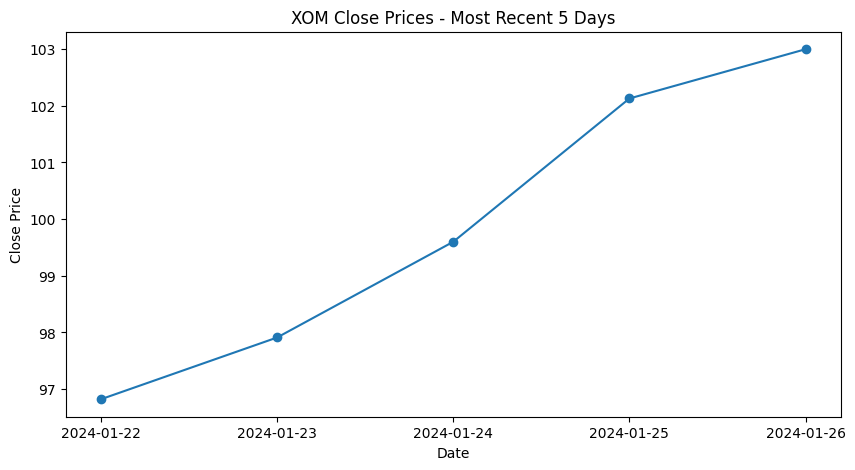


Invoking: `PythonREPLTool` with `{'code': "import matplotlib.pyplot as plt\n\n# Data\ndates = ['2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26']\nprices = [96.82, 97.91, 99.60, 102.13, 103.0]\n\n# Create plot\nplt.figure(figsize=(10,5))\nplt.plot(dates, prices, marker='o')\n\n# Title and labels\nplt.title('XOM Close Prices - Most Recent 5 Days')\nplt.xlabel('Date')\nplt.ylabel('Close Price')\n\n# Show plot\nplt.show()"}`


Succesfully executed:
```python
import matplotlib.pyplot as plt

# Data
dates = ['2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26']
prices = [96.82, 97.91, 99.60, 102.13, 103.0]

# Create plot
plt.figure(figsize=(10,5))
plt.plot(dates, prices, marker='o')

# Title and labels
plt.title('XOM Close Prices - Most Recent 5 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Show plot
plt.show()
```
Stdout: 

2024-01-29 16:14:44,574 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Here is the plot for the closing prices of XOM for the most recent 5 days:

[Plot Image]

- On 2024-01-22, the closing price was 96.82.
- On 2024-01-23, the closing price was 97.91.
- On 2024-01-24, the closing price was 99.60.
- On 2024-01-25, the closing price was 102.13.
- On 2024-01-26, the closing price was 103.0.

> Finished chain.


In [6]:
response = agent_executor(
            {"input": "plot close price for XOM most recent 5 days", "chat_history": []},
            # callbacks=[StdOutCallbackHandler()],
)